# Laborator 4

## Ex. 1.1

In [54]:
from pyod.utils.data import generate_data

X_train, X_test, y_train, y_test = generate_data(
    n_train=300,
    n_test=200,
    n_features=3,
    contamination=0.15
)

## Ex. 1.2

In [55]:
from pyod.models.ocsvm import OCSVM
from sklearn.metrics import balanced_accuracy_score, roc_auc_score

clf = OCSVM(kernel='linear', contamination=0.15)

clf.fit(X_train)

y_pred = clf.predict(X_test)

decision_scores = clf.decision_function(X_test)

balanced_acc = balanced_accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, decision_scores)

print("OCSVM with Linear Kernel")
print("Balanced Accuracy:", balanced_acc)
print("ROC AUC:", roc_auc)

OCSVM with Linear Kernel
Balanced Accuracy: 0.9666666666666667
ROC AUC: 0.9933333333333333


## Ex. 1.3

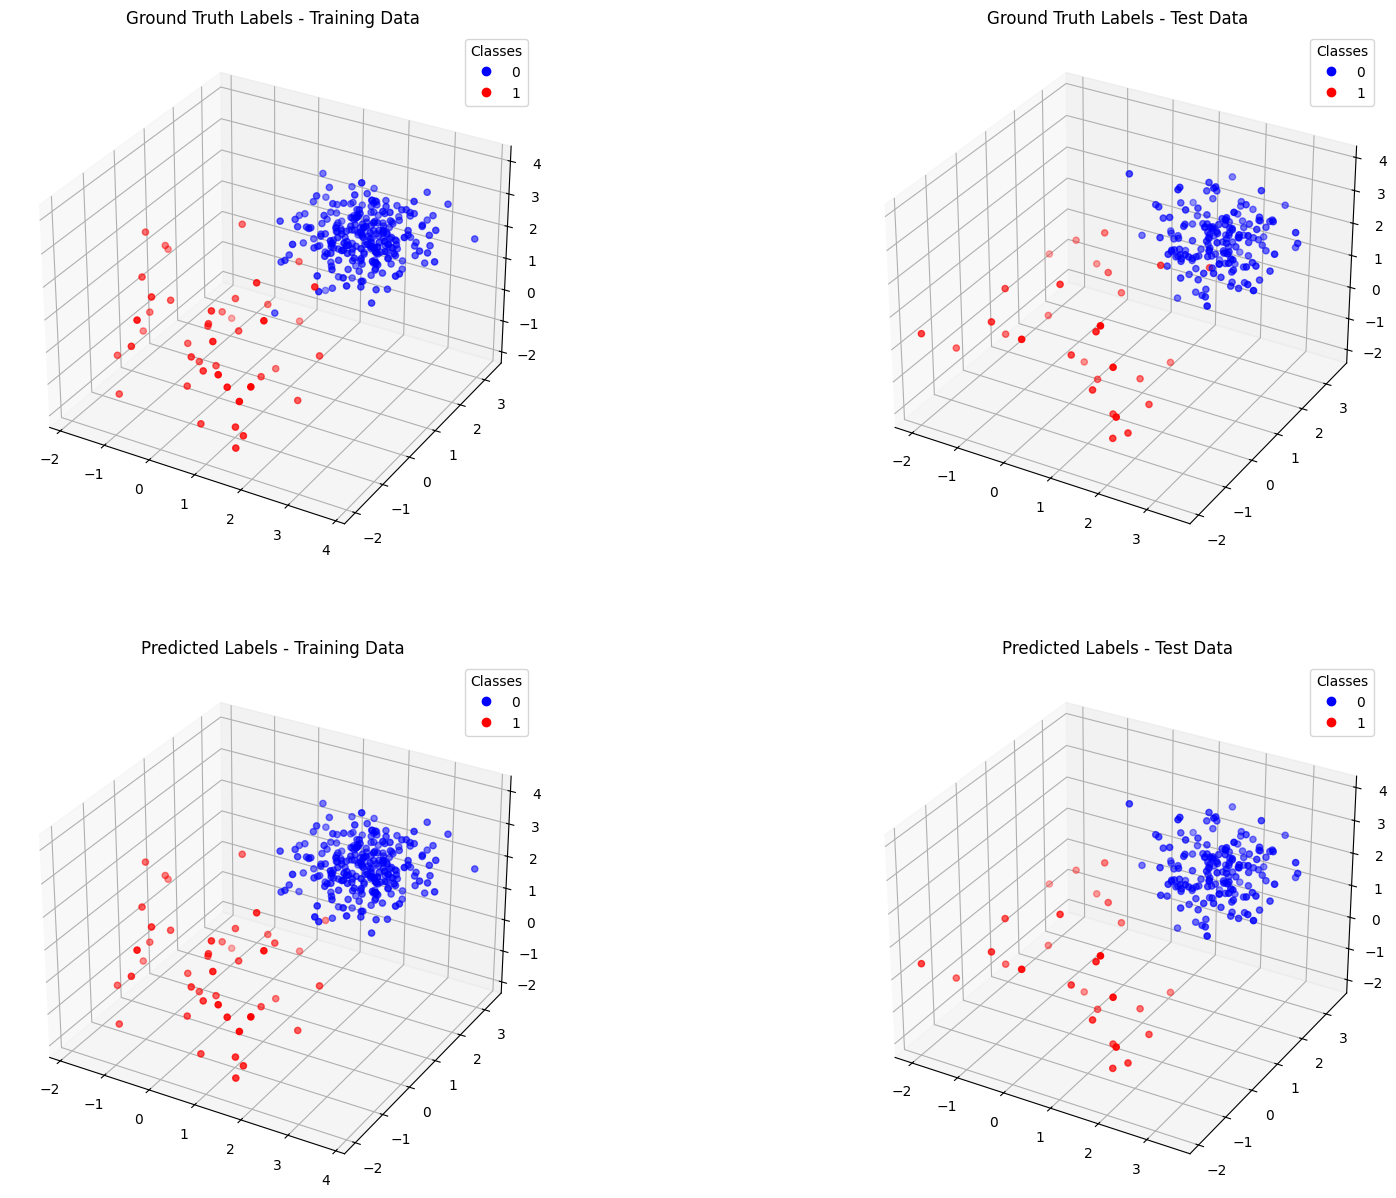

In [56]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

y_train_pred = clf.predict(X_train)

fig = plt.figure(figsize=(20, 15))

ax1 = fig.add_subplot(221, projection='3d')
scatter1 = ax1.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap='bwr')
ax1.set_title('Ground Truth Labels - Training Data')
ax1.legend(*scatter1.legend_elements(), title="Classes")

ax2 = fig.add_subplot(222, projection='3d')
scatter2 = ax2.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_test, cmap='bwr')
ax2.set_title('Ground Truth Labels - Test Data')
ax2.legend(*scatter2.legend_elements(), title="Classes")

ax3 = fig.add_subplot(223, projection='3d')
scatter3 = ax3.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train_pred, cmap='bwr')
ax3.set_title('Predicted Labels - Training Data')
ax3.legend(*scatter3.legend_elements(), title="Classes")

ax4 = fig.add_subplot(224, projection='3d')
scatter4 = ax4.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_pred, cmap='bwr')
ax4.set_title('Predicted Labels - Test Data')
ax4.legend(*scatter4.legend_elements(), title="Classes")

plt.show()

## Ex. 1.4

OCSVM with RBF Kernel
Balanced Accuracy: 0.9470588235294117
ROC AUC: 0.967843137254902


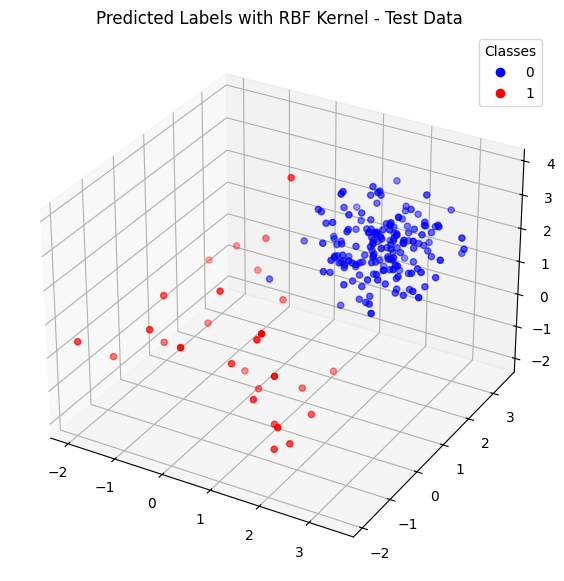

In [57]:
clf_rbf = OCSVM(kernel='rbf', contamination=0.15)

clf_rbf.fit(X_train)

y_pred_rbf = clf_rbf.predict(X_test)

decision_scores_rbf = clf_rbf.decision_function(X_test)

balanced_acc_rbf = balanced_accuracy_score(y_test, y_pred_rbf)
roc_auc_rbf = roc_auc_score(y_test, decision_scores_rbf)

print("OCSVM with RBF Kernel")
print("Balanced Accuracy:", balanced_acc_rbf)
print("ROC AUC:", roc_auc_rbf)

plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
scatter = ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_pred_rbf, cmap='bwr')
ax.set_title('Predicted Labels with RBF Kernel - Test Data')
ax.legend(*scatter.legend_elements(), title="Classes")
plt.show()

## Ex. 1.5

Epoch 1/30, Loss: 25.70860767364502
Epoch 2/30, Loss: 25.690234184265137
Epoch 3/30, Loss: 25.73511815071106
Epoch 4/30, Loss: 26.063101530075073
Epoch 5/30, Loss: 25.821815967559814
Epoch 6/30, Loss: 25.899040460586548
Epoch 7/30, Loss: 25.458536386489868
Epoch 8/30, Loss: 25.522847890853882
Epoch 9/30, Loss: 25.53039026260376
Epoch 10/30, Loss: 25.748997688293457
Epoch 11/30, Loss: 25.993164777755737
Epoch 12/30, Loss: 25.43506693840027
Epoch 13/30, Loss: 25.746012449264526
Epoch 14/30, Loss: 25.68544912338257
Epoch 15/30, Loss: 25.897600412368774
Epoch 16/30, Loss: 26.156655073165894
Epoch 17/30, Loss: 25.73129677772522
Epoch 18/30, Loss: 25.4788818359375
Epoch 19/30, Loss: 25.57550311088562
Epoch 20/30, Loss: 25.850507259368896
Epoch 21/30, Loss: 25.789746284484863
Epoch 22/30, Loss: 25.807613849639893
Epoch 23/30, Loss: 25.76115894317627
Epoch 24/30, Loss: 25.723599433898926
Epoch 25/30, Loss: 25.337926506996155
Epoch 26/30, Loss: 25.65144944190979
Epoch 27/30, Loss: 25.8966598510

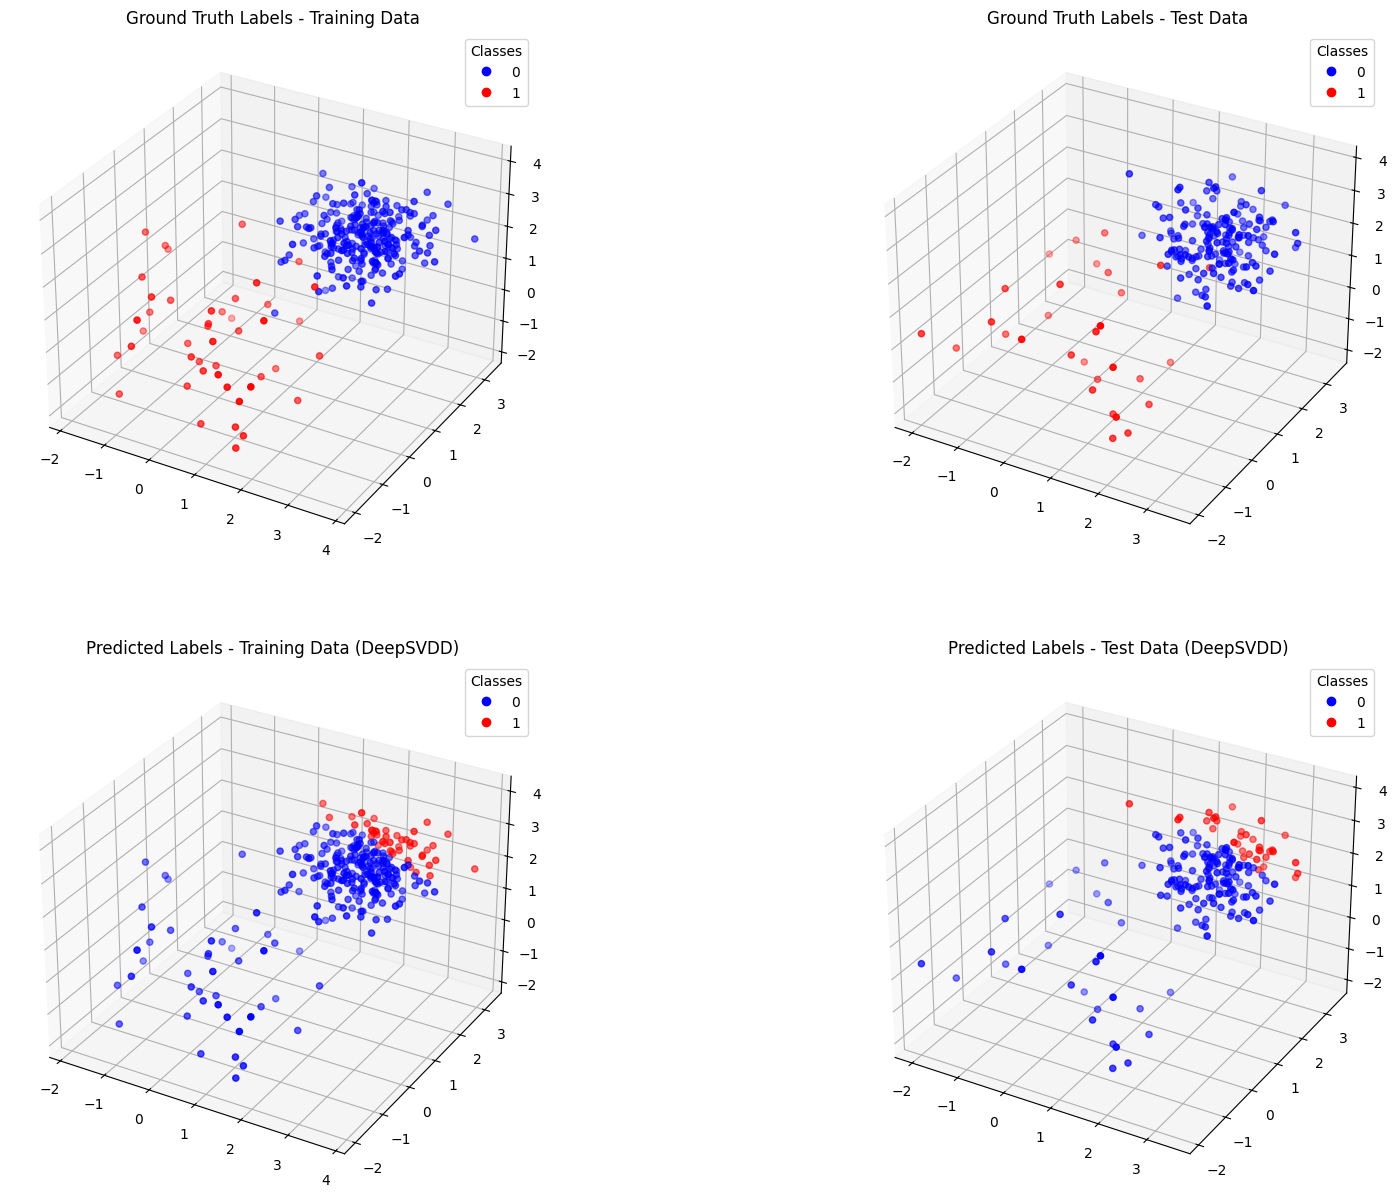

In [58]:
from pyod.models.deep_svdd import DeepSVDD

clf_deepsvdd = DeepSVDD(contamination=0.15, epochs=30, preprocessing=False, n_features=3)

clf_deepsvdd.fit(X_train)

y_pred_deepsvdd = clf_deepsvdd.predict(X_test)

decision_scores_deepsvdd = clf_deepsvdd.decision_function(X_test)

balanced_acc_deepsvdd = balanced_accuracy_score(y_test, y_pred_deepsvdd)
roc_auc_deepsvdd = roc_auc_score(y_test, decision_scores_deepsvdd)

print("DeepSVDD")
print("Balanced Accuracy:", balanced_acc_deepsvdd)
print("ROC AUC:", roc_auc_deepsvdd)

y_train_pred_deepsvdd = clf_deepsvdd.predict(X_train)

fig = plt.figure(figsize=(20, 15))

ax1 = fig.add_subplot(221, projection='3d')
scatter1 = ax1.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap='bwr')
ax1.set_title('Ground Truth Labels - Training Data')
ax1.legend(*scatter1.legend_elements(), title="Classes")

ax2 = fig.add_subplot(222, projection='3d')
scatter2 = ax2.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_test, cmap='bwr')
ax2.set_title('Ground Truth Labels - Test Data')
ax2.legend(*scatter2.legend_elements(), title="Classes")

ax3 = fig.add_subplot(223, projection='3d')
scatter3 = ax3.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train_pred_deepsvdd, cmap='bwr')
ax3.set_title('Predicted Labels - Training Data (DeepSVDD)')
ax3.legend(*scatter3.legend_elements(), title="Classes")

ax4 = fig.add_subplot(224, projection='3d')
scatter4 = ax4.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_pred_deepsvdd, cmap='bwr')
ax4.set_title('Predicted Labels - Test Data (DeepSVDD)')
ax4.legend(*scatter4.legend_elements(), title="Classes")

plt.show()


## Ex. 2.1

In [ ]:
import numpy as np
import scipy.io
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import OneClassSVM
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score

data = scipy.io.loadmat('cardio.mat')
X = data['X']
y_pyod = data['y'].ravel()

y_sklearn = 1 - 2 * y_pyod

X_train, X_test, y_train_gt, y_test_gt = train_test_split(
    X, y_sklearn, train_size=0.4
)


## Ex. 2.2

In [ ]:
contamination_rate = np.mean(y_train_gt == -1)

param_grid = {
    'oneclasssvm__kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'oneclasssvm__gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],
    'oneclasssvm__nu': [contamination_rate, 0.05, 0.1, 0.2, 0.5],
}

## Ex. 2.3 & 2.4

In [67]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('oneclasssvm', OneClassSVM())
])

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='balanced_accuracy',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train_gt)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('oneclasssvm', OneClassSVM())]),
             n_jobs=-1,
             param_grid={'oneclasssvm__gamma': ['scale', 'auto', 0.01, 0.1, 1,
                                                10],
                         'oneclasssvm__kernel': ['rbf', 'linear', 'poly',
                                                 'sigmoid'],
                         'oneclasssvm__nu': [0.09836065573770492, 0.05, 0.1,
                                             0.2, 0.5]},
             scoring='balanced_accuracy')

## Ex. 2.6

In [70]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_test = best_model.predict(X_test)
balanced_acc = balanced_accuracy_score(y_test_gt, y_pred_test)

print("Best Parameters:")
for param_name in sorted(best_params.keys()):
    print(f"{param_name}: {best_params[param_name]}")

print(f"\nBalanced Accuracy on Test Set: {balanced_acc:.4f}")


Best Parameters:
oneclasssvm__gamma: 0.01
oneclasssvm__kernel: rbf
oneclasssvm__nu: 0.2

Balanced Accuracy on Test Set: 0.8604


## Ex. 3.1

In [71]:
from scipy.io import loadmat
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = loadmat('shuttle.mat')
X = data['X']
y = data['y'].ravel()

y_binary = np.where(y == 1, 0, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.5, random_state=42, stratify=y_binary)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Ex. 3.2

In [73]:
from pyod.models.ocsvm import OCSVM
from pyod.models.deep_svdd import DeepSVDD
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score

ocsvm = OCSVM(kernel='rbf', gamma='auto')
ocsvm.fit(X_train_scaled)

deepsvdd = DeepSVDD(hidden_neurons=[64, 32], epochs=10, batch_size=256, n_features=X_train.shape[1])
deepsvdd.fit(X_train_scaled)

y_pred_ocsvm = ocsvm.predict(X_test_scaled)
y_scores_ocsvm = ocsvm.decision_function(X_test_scaled)

y_pred_deepsvdd = deepsvdd.predict(X_test_scaled)
y_scores_deepsvdd = deepsvdd.decision_function(X_test_scaled)

ba_ocsvm = balanced_accuracy_score(y_test, y_pred_ocsvm)
ba_deepsvdd = balanced_accuracy_score(y_test, y_pred_deepsvdd)

roc_auc_ocsvm = roc_auc_score(y_test, y_scores_ocsvm)
roc_auc_deepsvdd = roc_auc_score(y_test, y_scores_deepsvdd)

print("Balanced Accuracy (OCSVM):", ba_ocsvm)
print("Balanced Accuracy (DeepSVDD):", ba_deepsvdd)
print("ROC AUC (OCSVM):", roc_auc_ocsvm)
print("ROC AUC (DeepSVDD):", roc_auc_deepsvdd)

Epoch 1/10, Loss: 92.27447825670242
Epoch 2/10, Loss: 92.25956371426582
Epoch 3/10, Loss: 92.2435045838356
Epoch 4/10, Loss: 92.26617860794067
Epoch 5/10, Loss: 92.25275206565857
Epoch 6/10, Loss: 92.26518911123276
Epoch 7/10, Loss: 92.24907493591309
Epoch 8/10, Loss: 92.25963526964188
Epoch 9/10, Loss: 92.23976072669029
Epoch 10/10, Loss: 92.26629114151001
Balanced Accuracy (OCSVM): 0.029025640989765573
Balanced Accuracy (DeepSVDD): 0.03697811850679089
ROC AUC (OCSVM): 0.007895175126200183
ROC AUC (DeepSVDD): 0.010339952211280149


## Ex. 3.1

In [74]:
architecture_1 = [32, 16]
architecture_2 = [128, 64, 32, 16]
architecture_3 = [256, 128, 64]

deepsvdd_arch1 = DeepSVDD(hidden_neurons=architecture_1, epochs=10, batch_size=256, n_features=X_train.shape[1])
deepsvdd_arch2 = DeepSVDD(hidden_neurons=architecture_2, epochs=10, batch_size=256, n_features=X_train.shape[1])
deepsvdd_arch3 = DeepSVDD(hidden_neurons=architecture_3, epochs=10, batch_size=256, n_features=X_train.shape[1])

deepsvdd_arch1.fit(X_train_scaled)
deepsvdd_arch2.fit(X_train_scaled)
deepsvdd_arch3.fit(X_train_scaled)

y_pred_arch1 = deepsvdd_arch1.predict(X_test_scaled)
y_scores_arch1 = deepsvdd_arch1.decision_function(X_test_scaled)
ba_arch1 = balanced_accuracy_score(y_test, y_pred_arch1)
roc_auc_arch1 = roc_auc_score(y_test, y_scores_arch1)

y_pred_arch2 = deepsvdd_arch2.predict(X_test_scaled)
y_scores_arch2 = deepsvdd_arch2.decision_function(X_test_scaled)
ba_arch2 = balanced_accuracy_score(y_test, y_pred_arch2)
roc_auc_arch2 = roc_auc_score(y_test, y_scores_arch2)

y_pred_arch3 = deepsvdd_arch3.predict(X_test_scaled)
y_scores_arch3 = deepsvdd_arch3.decision_function(X_test_scaled)
ba_arch3 = balanced_accuracy_score(y_test, y_pred_arch3)
roc_auc_arch3 = roc_auc_score(y_test, y_scores_arch3)

print("Balanced Accuracy 1:", ba_arch1)
print("Balanced Accuracy 2:", ba_arch2)
print("Balanced Accuracy 3:", ba_arch3)
print("ROC AUC 1:", roc_auc_arch1)
print("ROC AUC 2:", roc_auc_arch2)
print("ROC AUC 3:", roc_auc_arch3)

Epoch 1/10, Loss: 26.75095498561859
Epoch 2/10, Loss: 26.74728687107563
Epoch 3/10, Loss: 26.747273951768875
Epoch 4/10, Loss: 26.748693868517876
Epoch 5/10, Loss: 26.84262701869011
Epoch 6/10, Loss: 26.75120234489441
Epoch 7/10, Loss: 26.74360616505146
Epoch 8/10, Loss: 26.739939346909523
Epoch 9/10, Loss: 26.749504148960114
Epoch 10/10, Loss: 26.820327296853065
Epoch 1/10, Loss: 1.0200209026224911
Epoch 2/10, Loss: 1.1720040589571
Epoch 3/10, Loss: 1.2295202598907053
Epoch 4/10, Loss: 1.1570821865461767
Epoch 5/10, Loss: 1.0604636622592807
Epoch 6/10, Loss: 1.1143263541162014
Epoch 7/10, Loss: 1.0803547105751932
Epoch 8/10, Loss: 1.076205370016396
Epoch 9/10, Loss: 1.104234913829714
Epoch 10/10, Loss: 1.138620026409626
Epoch 1/10, Loss: 31.418494060635567
Epoch 2/10, Loss: 30.715733855962753
Epoch 3/10, Loss: 31.140688598155975
Epoch 4/10, Loss: 32.00207021832466
Epoch 5/10, Loss: 30.44482071697712
Epoch 6/10, Loss: 32.457977414131165
Epoch 7/10, Loss: 29.890936493873596
Epoch 8/10, 